# Customer Segmentation on Mall Customers Data

In [164]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [132]:
data = pd.read_csv("../dataset/Mall_Customers.csv")
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [133]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
165,166,Female,36,85,75
163,164,Female,31,81,93
81,82,Male,38,54,55
11,12,Female,35,19,99
63,64,Female,54,47,59
93,94,Female,40,60,40
26,27,Female,45,28,32
45,46,Female,24,39,65
48,49,Female,29,40,42
44,45,Female,49,39,28


In [134]:
data.shape

(200, 5)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [136]:
data.duplicated().sum()

np.int64(0)

In [137]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [138]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [139]:
data["Spending Score (1-100)"].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [140]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [141]:
data["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [142]:
gender_counts = data["Gender"].value_counts()
gender_percentage = data["Gender"].value_counts(normalize=True) * 100
print(gender_percentage)

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


In [143]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
152,153,Female,44,78,20
5,6,Female,22,17,76
103,104,Male,26,62,55
33,34,Male,18,33,92
49,50,Female,31,40,42
39,40,Female,20,37,75
164,165,Male,50,85,26
22,23,Female,46,25,5
16,17,Female,35,21,35
85,86,Male,48,54,46


In [144]:
# dropping the unnecessary column CustomerID
data = data.drop("CustomerID", axis=1)
data.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
85,Male,48,54,46
45,Female,24,39,65
84,Female,21,54,57
155,Female,27,78,89
6,Female,35,18,6
38,Female,36,37,26
49,Female,31,40,42
17,Male,20,21,66
193,Female,38,113,91
57,Male,69,44,46


In [145]:
data["Gender"] = data["Gender"].replace(
    {
        "Male": 0,
        "Female": 1
    }
)
data.sample(10)

/tmp/ipykernel_17452/3435293700.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace(


,Gender,Age,Annual Income (k$),Spending Score (1-100)
18,0,52,23,29
80,0,57,54,51
183,1,29,98,88
123,0,39,69,91
21,0,25,24,73
77,0,40,54,48
113,0,19,64,46
91,0,18,59,41
71,1,47,49,42
158,0,34,78,1


In [146]:
data["Gender"].value_counts()

Gender
1    112
0     88
Name: count, dtype: int64

In [147]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


In [148]:
# scaling the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [149]:
print(X_scaled)

[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [ 0.88640526 -1.20926872 -1.66266033  1.00159627]
 [ 0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [ 0.88640526 -1.13750203 -1.62449091  1.70038436]
 [-1.12815215  1.80493225 -1.58632148 -1.83237767]
 [ 0.88640526 -0.6351352  -1.58632148  0.84631002]
 [-1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [ 0.88640526 -0.27630176 -1.58632148  1.89449216]
 [ 0.88640526  1.37433211 -1.54815205 -1.36651894]
 [ 0.88640526 -1.06573534 -1.54815205  1.04041783]
 [-1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [-1.12815215 -1.20926872 -1.54815205  1.11806095]
 [ 0.88640526 -0.27630176 -1.50998262 -0.59008772]
 [-1.12815215 -1.3528021  -1.50998262  0.61338066]
 [-1.12815215  0.94373197 -1.43364376 -0.82301709]
 [ 0.88640526 -0.27630176 -1.43

In [150]:
# choosing the number of clusters using the elbow method
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        random_state=21,
        n_init=10
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

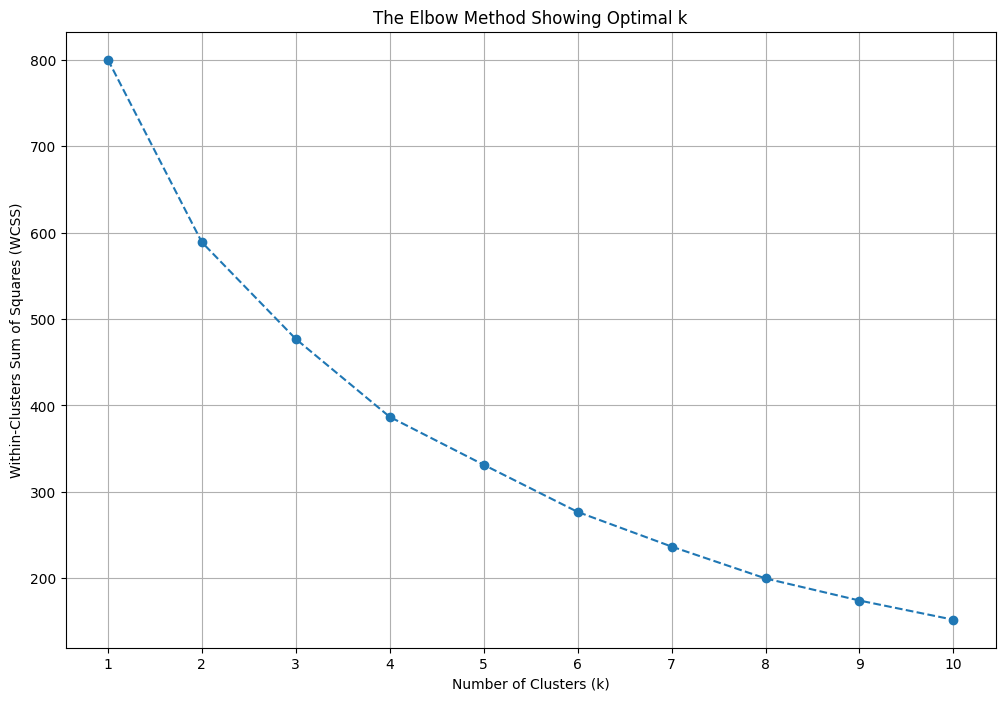

In [151]:
# plotting the elbow curve
plt.figure(figsize=(12, 8))
plt.plot(
    k_range,
    wcss,
    marker= "o",
    linestyle="--"
)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Clusters Sum of Squares (WCSS)")
plt.title("The Elbow Method Showing Optimal k")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [152]:
# fitting with the optimal k
opt_k = 4
kmeans = KMeans(
    n_clusters=opt_k,
    init="k-means++",
    random_state=21,
    n_init=10
)
kmeans.fit(X_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,21
,copy_x,True
,algorithm,'lloyd'


In [153]:
# customer clusters
cluster_labels = kmeans.labels_
data["Clusters"] = cluster_labels
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,3
3,1,23,16,77,1
4,1,31,17,40,1
5,1,22,17,76,1
6,1,35,18,6,3
7,1,23,18,94,1
8,0,64,19,3,2
9,1,30,19,72,1


In [154]:
data["Clusters"].value_counts()

Clusters
1    57
3    55
2    48
0    40
Name: count, dtype: int64

In [155]:
# Visualize the clusters using PCA for 2D projection
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)


In [156]:
# dataframe for pca results and other cluster labels
pca_df = pd.DataFrame(
    data = x_pca,
    columns = [
        "Principal Component 1",
        "Principal Component 2"
    ]
)
pca_df["Clusters"] = cluster_labels

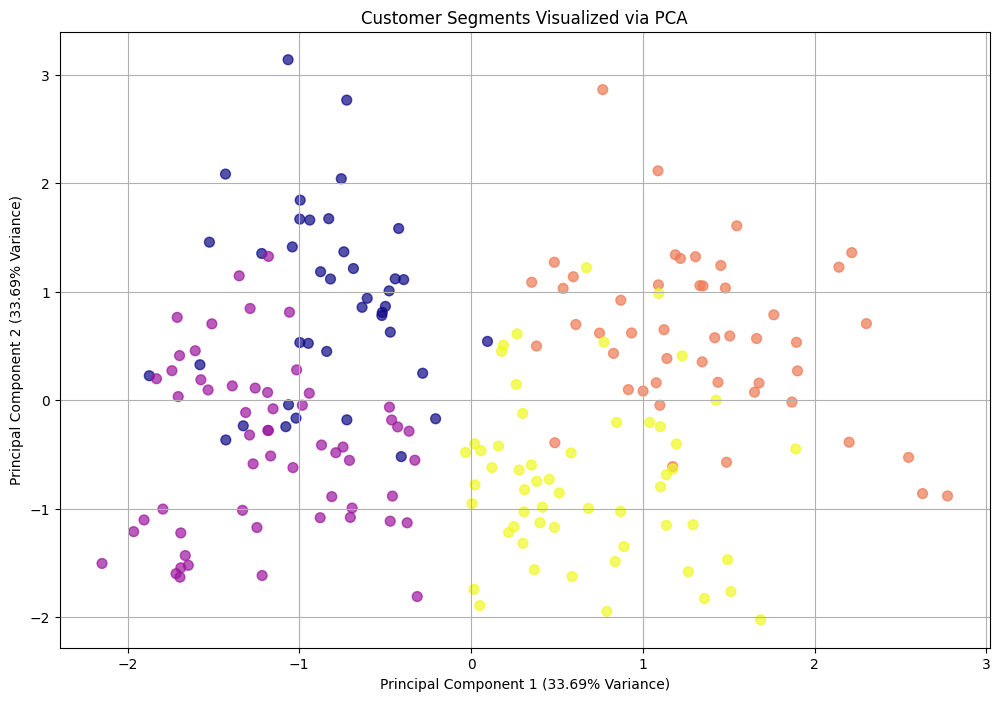

In [157]:
# plotting the 2D projection
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    pca_df["Principal Component 1"],
    pca_df["Principal Component 2"],
    c=pca_df["Clusters"],
    cmap="plasma",
    alpha=0.7,
    s=50
)
plt.xlabel("Principal Component 1 ({:.2f}% Variance)".format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel("Principal Component 2 ({:.2f}% Variance)".format(pca.explained_variance_ratio_[0] * 100))
plt.title("Customer Segments Visualized via PCA")
plt.grid(True)
plt.show()

In [159]:
# Group the original data by the cluster label and calculate the mean of all features
cluster_profile = data.groupby('Clusters').mean(numeric_only=True)
print(cluster_profile)

          Gender        Age  Annual Income (k$)  Spending Score (1-100)
Clusters                                                               
0            0.0  28.250000           62.000000               71.675000
1            1.0  28.438596           59.666667               67.684211
2            0.0  49.437500           62.416667               29.208333
3            1.0  48.109091           58.818182               34.781818


In [160]:
#the count of customers in each segment
cluster_count = data["Clusters"].value_counts().sort_index()
print("\nNumber of customers in each cluster:")
print(cluster_count)


Number of customers in each cluster:
Clusters
0    40
1    57
2    48
3    55
Name: count, dtype: int64


In [162]:
if "Gender" in data.columns:
    gender_breakdown = data.groupby("Clusters")["Gender"].value_counts(normalize=True)
    print("\nGender breakdown per cluster (approximate proportion female):")
    print(cluster_profile["Gender"])


Gender breakdown per cluster (approximate proportion female):
Clusters
0    0.0
1    1.0
2    0.0
3    1.0
Name: Gender, dtype: float64


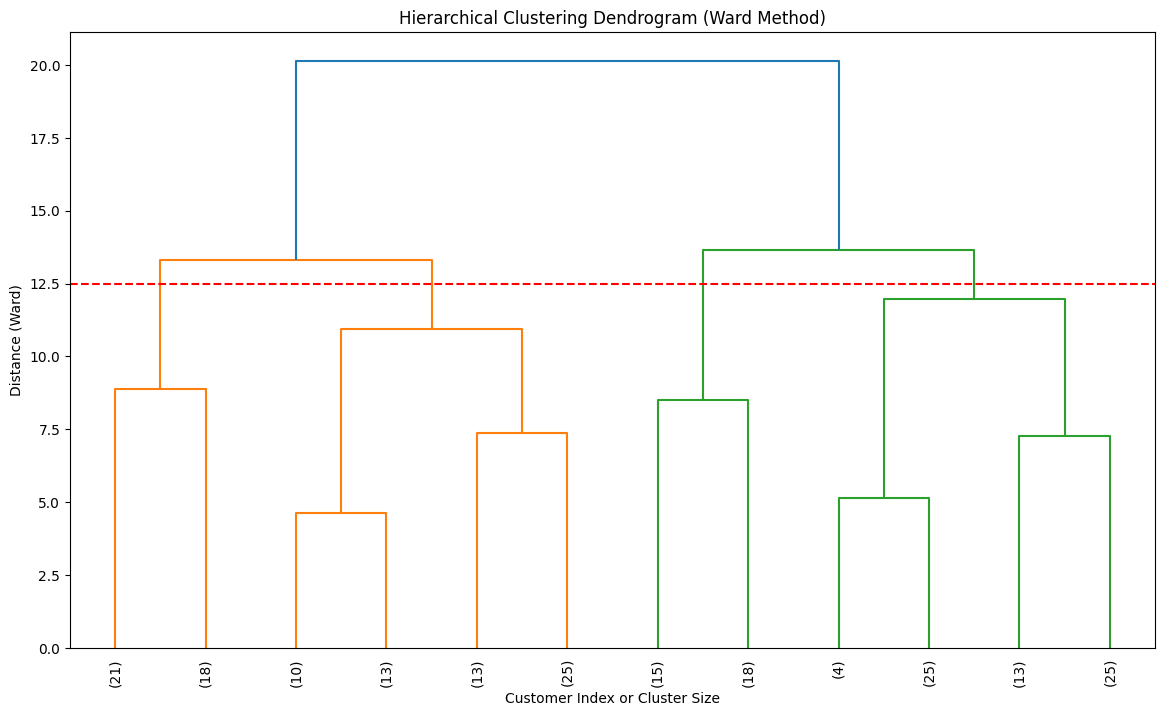

In [169]:
plt.figure(figsize=(14, 8))
Z = linkage(X_scaled, method='ward')
dendrogram(
    Z,
    truncate_mode="lastp",
    p=12,
    show_leaf_counts=True,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Customer Index or Cluster Size')
plt.ylabel('Distance (Ward)')
plt.axhline(y=12.5, color='r', linestyle='--')
plt.show()